In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from deep_convnet import DeepConvNet
%matplotlib inline

from common.functions import softmax

Using TensorFlow backend.


In [2]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 正規化
x_test = x_test.astype(np.float32) / 255.0

In [4]:
network = DeepConvNet()

network.load_params("deep_convnet_params.pkl")
print("loaded Network Parameters!")

loaded Network Parameters!


In [5]:
true_idxs = [[], [], [], [], [], [], [], [], [], []]
for i, t in enumerate(x_test):
    pre_l = np.argmax(network.predict(t.reshape(1, 1, 28, 28)))
    true_l = t_test[i]
    if pre_l == true_l:
        true_idxs[true_l].append(i)

In [6]:
len_min = x_test.shape[0]
sum_true_idxs = 0
for i, idxs in enumerate(true_idxs):
    len_idxs = len(idxs)
    print("i", len_idxs)
    sum_true_idxs += len_idxs
    if len_idxs < len_min:
        len_min = len_idxs
        
print("---")
print("len_min", len_min)
print("sum of true_idxs", sum_true_idxs)
print("sum of test_x", x_test.shape[0])
print("acc", sum_true_idxs / x_test.shape[0])

i 975
i 1126
i 1029
i 1009
i 972
i 882
i 950
i 1016
i 970
i 996
---
len_min 882
sum of true_idxs 9925
sum of test_x 10000
acc 0.9925


In [7]:
len_true_nums = 800
true_x_list = []
true_t_list = []
for i in range(10):
    true_nums = true_idxs[i][:len_true_nums]
    true_x_list.append(list(map(lambda x: [x_test[x]], true_nums)))
    true_t_list.append(list(map(lambda x: t_test[x], true_nums)))
    
true_x_list = np.array(true_x_list)
true_t_list = np.array(true_t_list)
print("true_x_list.shape", true_x_list.shape)
print("true_t_list.shape", true_t_list.shape)

true_x_list.shape (10, 800, 1, 28, 28)
true_t_list.shape (10, 800)


In [8]:
def generate_adv(x, label, network, eps=0.01):
    d, g = network.gradient_for_fgsm(x.reshape(1, 1, 28, 28), np.array([label]))
    d = d.reshape(28, 28)
    p = eps * np.sign(d)
    adv = (x + p).clip(min=0, max=1)
    adv = adv.reshape(1, 1, 28, 28)
    return adv

In [9]:
def change_adv_list(x_list, t_list, network, eps):
    adv_list = []
    for x, t in zip(x_list, t_list):
        adv = generate_adv(x, t, network, eps)
        adv_list.append(adv.reshape(1, 28, 28))
        
    adv_list = np.array(adv_list)
    return adv_list

In [15]:
eps = 0.2

In [16]:
fgsm_test = []
for i, (x_li, t_li) in enumerate(zip(true_x_list, true_t_list)):
    print(i)
    fgsm_li = change_adv_list(x_li, t_li, network, eps)
    fgsm_test.append(fgsm_li)
    print("無加工に対する正答率：", network.accuracy(x_li, t_li))
    print("FGSMに対する正答率：", network.accuracy(fgsm_li, t_li))
    print("---")
    
fgsm_test = np.array(fgsm_test)
print("fgsm_test.shape",fgsm_test.shape)

0
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.83875
---
1
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.575
---
2
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.86375
---
3
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.89375
---
4
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.6375
---
5
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.69875
---
6
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.83
---
7
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.71375
---
8
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.60625
---
9
無加工に対する正答率： 1.0
FGSMに対する正答率： 0.74875
---
fgsm_test.shape (10, 800, 1, 28, 28)


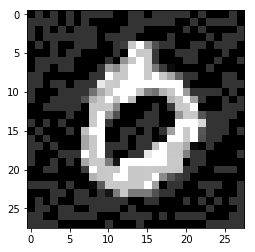

In [17]:
plt.imshow(fgsm_test[0,0,0], 'gray')
plt.show()